In [1]:
#Loading Essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loadig dataset
df=pd.read_csv("uberdata-analysis.csv")

In [3]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [4]:
len(df["Request id"].unique())

6745

In [5]:
df.shape

(6745, 6)

In [6]:
df.isna().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [7]:
df.isnull().sum()/df.shape[0]*100

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [9]:
df["Request timestamp"].value_counts()

11/7/2016 19:02        6
11/7/2016 17:57        6
11/7/2016 8:37         6
11/7/2016 9:40         6
12/7/2016 21:42        5
                      ..
15-07-2016 18:08:33    1
15-07-2016 04:50:54    1
14-07-2016 18:42:23    1
13-07-2016 19:26:50    1
15-07-2016 23:55:03    1
Name: Request timestamp, Length: 5618, dtype: int64

In [10]:
df["Request timestamp"]=df["Request timestamp"].astype(str)

In [11]:
df["Request timestamp"]=df["Request timestamp"].replace("/","-")

In [12]:
#Converting to DataTime object
df["Request timestamp"]=pd.to_datetime(df["Request timestamp"],dayfirst=True)

In [13]:
df["Request timestamp"]

0      2016-07-11 11:51:00
1      2016-07-11 17:57:00
2      2016-07-12 09:17:00
3      2016-07-12 21:08:00
4      2016-07-13 08:33:16
               ...        
6740   2016-07-15 23:49:03
6741   2016-07-15 23:50:05
6742   2016-07-15 23:52:06
6743   2016-07-15 23:54:39
6744   2016-07-15 23:55:03
Name: Request timestamp, Length: 6745, dtype: datetime64[ns]

In [14]:
df["Drop timestamp"]=pd.to_datetime(df["Drop timestamp"],dayfirst=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [16]:
df["Drop timestamp"]

0      2016-07-11 13:00:00
1      2016-07-11 18:47:00
2      2016-07-12 09:58:00
3      2016-07-12 22:03:00
4      2016-07-13 09:25:47
               ...        
6740                   NaT
6741                   NaT
6742                   NaT
6743                   NaT
6744                   NaT
Name: Drop timestamp, Length: 6745, dtype: datetime64[ns]

In [17]:
req_hour=df["Request timestamp"].dt.hour

In [18]:
req_hour

0       11
1       17
2        9
3       21
4        8
        ..
6740    23
6741    23
6742    23
6743    23
6744    23
Name: Request timestamp, Length: 6745, dtype: int64

In [19]:
len(req_hour)

6745

In [20]:
df["req_hour"]=req_hour

In [21]:
req_day=df["Request timestamp"].dt.day

In [22]:
df["req_day"]=req_day

In [23]:
df


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13
...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,15
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,15
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,15
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,15


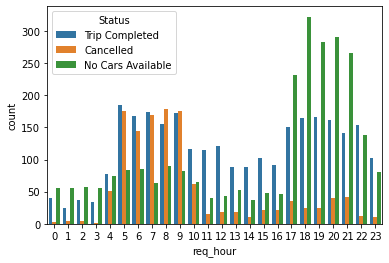

In [24]:
_=sns.countplot(x="req_hour",data=df,hue="Status")

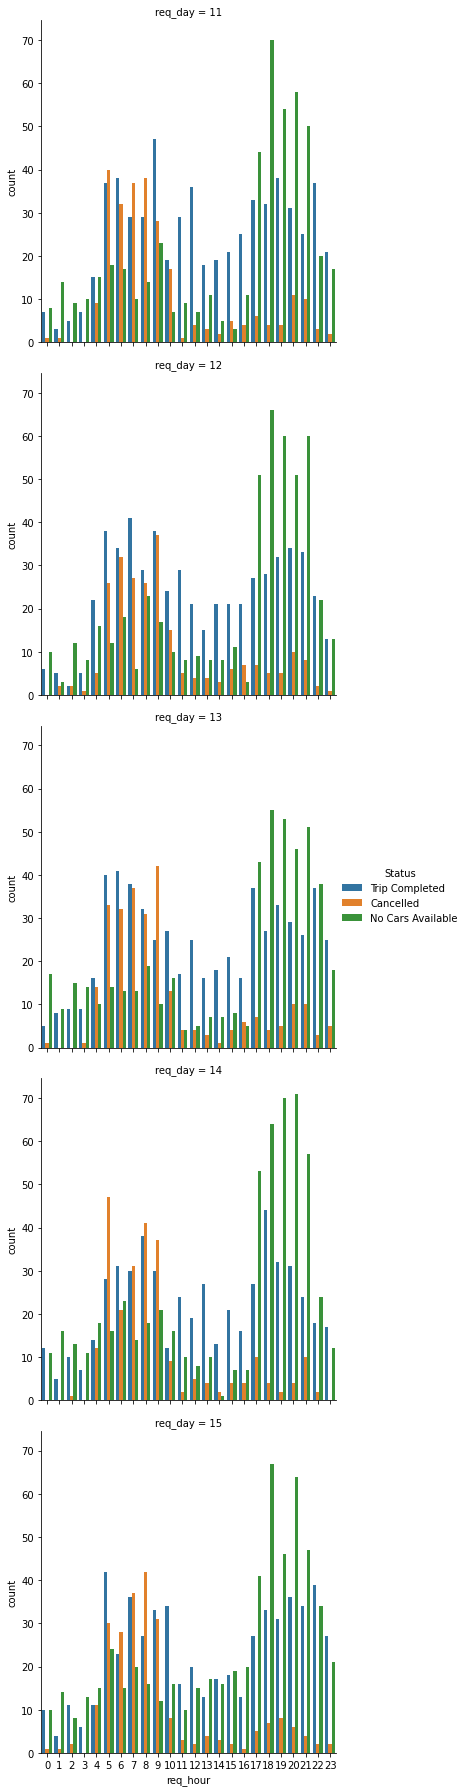

In [25]:
_=sns.catplot(x="req_hour",data=df,row="req_day",kind="count",hue="Status")

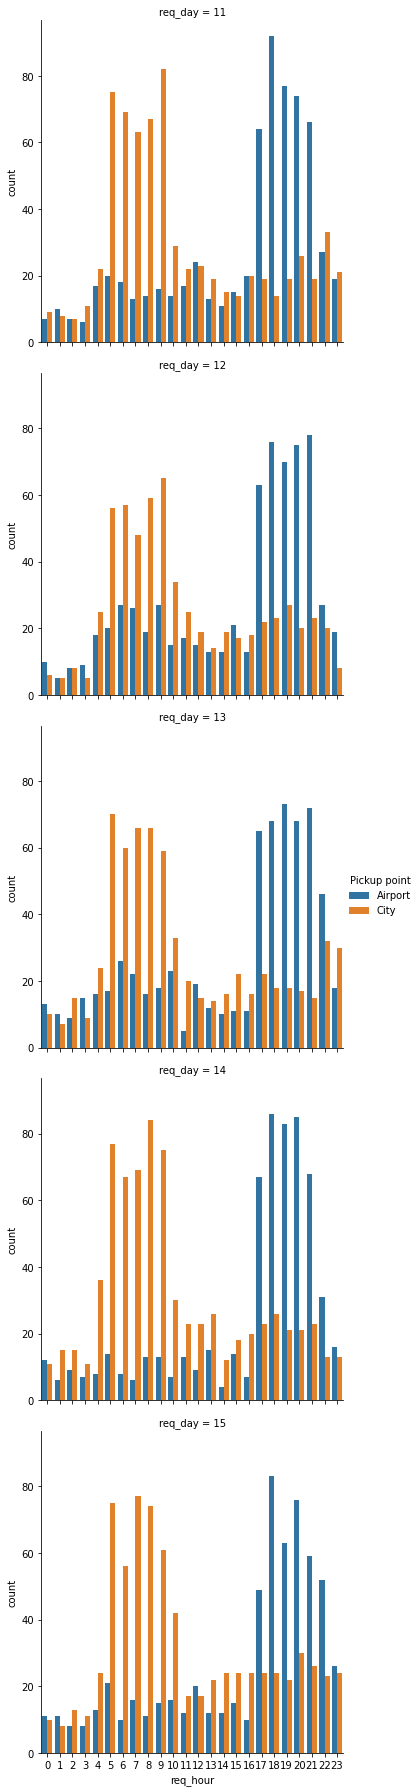

In [26]:
_=sns.catplot(x="req_hour",data=df,row="req_day",kind="count",hue="Pickup point")

C:\Users\MY DELL\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


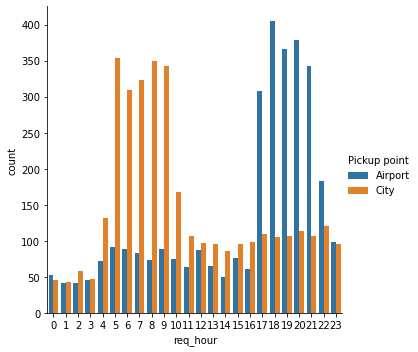

In [27]:
_=sns.factorplot(x="req_hour",data=df,kind="count",hue="Pickup point")

In [28]:
df["Time Slot"]=0

In [29]:
j=0
for i in df["req_hour"]:
    
    if df.iloc[j,6]<5:
        df.iloc[j,8]="PreMorning"
      
    elif 5<=df.iloc[j,6] <10:
        df.iloc[j,8]="Morning Rush"
    elif 10<=df.iloc[j,6]<17:
        df.iloc[j,8]="Day Time"
    elif 17<=df.iloc[j,6]<22:
        df.iloc[j,8]="Evening Time"
    else:
        df.iloc[j,8]="Late Night"
    j=j+1    

In [30]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time Slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,Day Time
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,Evening Time
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,Morning Rush
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,Evening Time
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning Rush
...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,15,Late Night
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,15,Late Night
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,15,Late Night
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,15,Late Night


In [31]:
df["Time Slot"].value_counts()

Evening Time    2342
Morning Rush    2103
Day Time        1224
PreMorning       578
Late Night       498
Name: Time Slot, dtype: int64

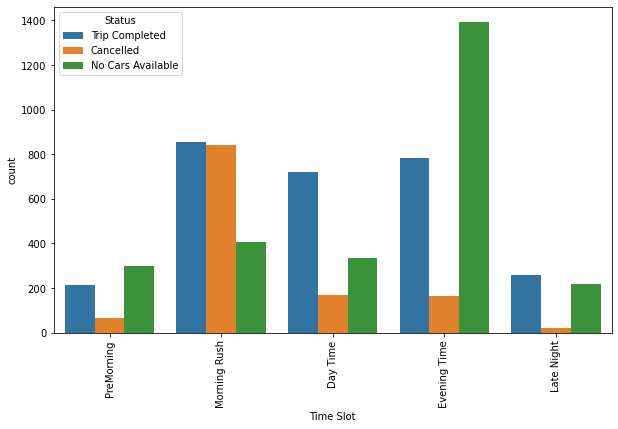

In [32]:
plt.figure(figsize=(10,6))
sns.countplot(x="Time Slot",data=df,hue="Status",
            order=["PreMorning","Morning Rush","Day Time","Evening Time","Late Night"])
plt.xticks(rotation=90)
plt.show()

# Morning Rush 

In [33]:
df_morning_rush=df[df["Time Slot"]=="Morning Rush"]

In [34]:
df_morning_rush.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time Slot
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,Morning Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning Rush
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,6,14,Morning Rush
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,5,15,Morning Rush
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,6,11,Morning Rush


In [35]:
df_morning_rush["Status"].value_counts()

Trip Completed       854
Cancelled            843
No Cars Available    406
Name: Status, dtype: int64

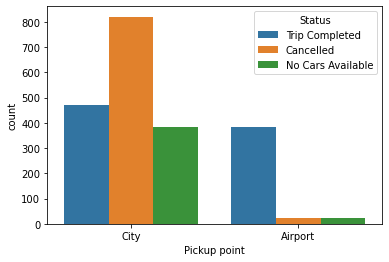

In [36]:
sns.countplot(x="Pickup point",hue="Status",data=df_morning_rush)
plt.show()

## Supply and Demand in Morning Rush city

In [37]:
# During Morning rush Demand loction city
df_morning_rush[df_morning_rush["Pickup point"]=="City"].shape[0]

1677

In [38]:
df_city_cancelled=df_morning_rush[(df_morning_rush["Pickup point"]=="City") & (df_morning_rush["Status"]=="Cancelled")]

In [39]:
df_city_cancelled.shape[0]

820

In [40]:
# During Morning rush Supply loction city
df_morning_rush[(df_morning_rush["Pickup point"]=="City") & (df_morning_rush["Status"]=="Trip Completed")].shape[0]

472

In [41]:
df_morning_rush[(df_morning_rush["Pickup point"]=="City") & (df_morning_rush["Status"]=="No Cars Available")].shape[0]

385

## Supply and Demand in Morning Rush Airport

In [42]:
# Demand during Morning rush location Airport
df_morning_rush[df_morning_rush["Pickup point"]=="Airport"].shape[0]

426

In [43]:
df_airport_cancelled=df_morning_rush[(df_morning_rush["Pickup point"]=="Airport") & (df_morning_rush["Status"]=="Cancelled")]

In [44]:
df_airport_cancelled.shape[0]

23

In [45]:
#Supply during Morning rush location Airport
df_morning_rush[(df_morning_rush["Pickup point"]=="Airport") & (df_morning_rush["Status"]=="Trip Completed")].shape[0]

382

In [46]:
df_morning_rush[(df_morning_rush["Pickup point"]=="Airport") & (df_morning_rush["Status"]=="No Cars Available")].shape[0]

21

# Evening rush

In [47]:
df_evening_rush=df[df["Time Slot"]=="Evening Time"]

In [48]:
df_evening_rush.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time Slot
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,Evening Time
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,Evening Time
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,21,13,Evening Time
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,17,15,Evening Time
15,3482,Airport,2.0,Trip Completed,2016-07-13 17:23:18,2016-07-13 18:20:51,17,13,Evening Time


In [49]:
df_evening_rush["Status"].value_counts()

No Cars Available    1392
Trip Completed        784
Cancelled             166
Name: Status, dtype: int64

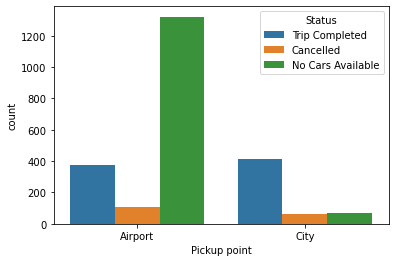

In [50]:
sns.countplot(x="Pickup point",data=df_evening_rush,hue="Status")
plt.show()

## supply and Demand in Evening time City

In [51]:
# Demand during Evening time loction from city 
df_evening_rush[df_evening_rush["Pickup point"]=="City"].shape[0]

542

In [52]:
# trip cancellation during Evening time location from City

df_city_cancelled=df_evening_rush[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="Cancelled")]

In [53]:
df_city_cancelled.shape[0]

60

In [54]:
# Supply during Evening time loction city
df_evening_rush[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="Trip Completed")].shape[0]

411

In [55]:
df_evening_rush[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="No Cars Available")].shape[0]

71

## supply and Demand in Evening time Airport

In [56]:
# trip cancellation during Evening time location from Airport
df_airport_cancelled=df_evening_rush[(df_evening_rush["Pickup point"]=="Airport") & (df_evening_rush["Status"]=="Cancelled")]

In [57]:
# Demand during Evening time loction from Airport 

df_evening_rush[df_evening_rush["Pickup point"]=="Airport"].shape[0]

1800

In [58]:
df_airport_cancelled.shape[0]

106

In [59]:
df_evening_rush[(df_evening_rush["Pickup point"]=="Airport") & (df_evening_rush["Status"]=="Trip Completed")].shape[0]

373

In [60]:
df_evening_rush[(df_evening_rush["Pickup point"]=="Airport") & (df_evening_rush["Status"]=="No Cars Available")].shape[0]

1321

# Pie chart for evening

In [61]:
df_evening_city=df[(df["Pickup point"]=="City")&(df["Time Slot"]=="Evening Time")]

In [62]:
df_evening_city.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time Slot
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,17,15,Evening Time
25,5254,City,3.0,Trip Completed,2016-07-14 21:23:03,2016-07-14 22:25:19,21,14,Evening Time
40,1179,City,5.0,Trip Completed,2016-07-11 20:58:00,2016-07-11 21:45:00,20,11,Evening Time
43,2559,City,5.0,Trip Completed,2016-07-12 21:32:00,2016-07-12 22:29:00,21,12,Evening Time
52,3882,City,6.0,Trip Completed,2016-07-13 21:53:03,2016-07-13 22:45:24,21,13,Evening Time


In [63]:
df_evening_city_count=pd.DataFrame(df_evening_city["Status"].value_counts())

In [64]:
df_evening_city_count

,Status
Trip Completed,411
No Cars Available,71
Cancelled,60


In [65]:
df_evening_city_count["Status"].values

array([411,  71,  60], dtype=int64)

In [66]:
df_evening_city_count["Status"].index

Index(['Trip Completed', 'No Cars Available', 'Cancelled'], dtype='object')

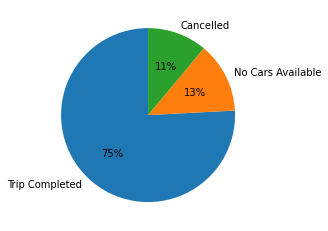

In [81]:
#for inger use i
fig,ax=plt.subplots()
ax.pie(df_evening_city_count["Status"].values,labels=df_evening_city_count["Status"].index,
       autopct="%i%%",startangle=90)
plt.show()

# Pie Chart for Morning rush

In [68]:
df_morning_city=df[(df["Pickup point"]=="City")&(df["Time Slot"]=="Morning Rush")]

In [69]:
df_morning_city.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time Slot
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,Morning Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning Rush
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,6,11,Morning Rush
13,3075,City,2.0,Trip Completed,2016-07-13 08:02:53,2016-07-13 09:16:19,8,13,Morning Rush
30,1826,City,4.0,Trip Completed,2016-07-12 09:27:00,2016-07-12 10:27:00,9,12,Morning Rush


In [70]:
df_morning_city_count=pd.DataFrame(df_morning_city["Status"].value_counts())

In [71]:
df_morning_city_count

,Status
Cancelled,820
Trip Completed,472
No Cars Available,385


In [72]:
df_morning_city_count["Status"].index

Index(['Cancelled', 'Trip Completed', 'No Cars Available'], dtype='object')

In [73]:
df_morning_city_count["Status"].values

array([820, 472, 385], dtype=int64)

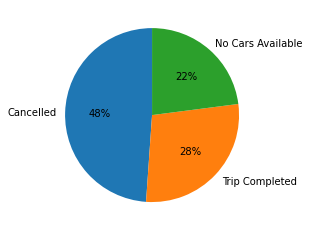

In [74]:
fig,ax=plt.subplots()
ax.pie(x=df_morning_city_count["Status"].values,labels=df_morning_city_count["Status"].index,autopct="%i%%",startangle=90)
plt.show()

## Pie Chart Evening Airport

In [75]:
df_evening_Airport=df[(df["Pickup point"]=="Airport")&(df["Time Slot"]=="Evening Time")]

In [76]:
df_evening_Airport.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time Slot
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,Evening Time
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,Evening Time
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,21,13,Evening Time
15,3482,Airport,2.0,Trip Completed,2016-07-13 17:23:18,2016-07-13 18:20:51,17,13,Evening Time
19,960,Airport,3.0,Trip Completed,2016-07-11 18:45:00,2016-07-11 19:23:00,18,11,Evening Time


In [77]:
df_evening_Airport_count=pd.DataFrame(df_evening_Airport["Status"].value_counts())

In [78]:
df_evening_Airport_count["Status"].index

Index(['No Cars Available', 'Trip Completed', 'Cancelled'], dtype='object')

In [79]:
df_evening_Airport_count["Status"].values

array([1321,  373,  106], dtype=int64)

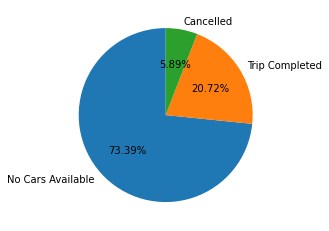

In [80]:
fig,ax=plt.subplots()
ax.pie(x=df_evening_Airport_count["Status"].values,labels=df_evening_Airport_count["Status"].index,
       autopct="%.2f%%",startangle=90)
plt.show()

# Inferences/Recommendation

- 1. They cound be given a bonus for each trip they complete from the city to the airport in the morning rush.this will insure that less number of trips are cancelled.

- 2. Uber can pay for the gas mileage of drivers to come back to the city without a ride.
- 3. drivers can again be given bonusto complete a trip from the airport in the evening. this will ensure that the supply increasesat the airport.
- 4. Uber can also pay to drivers  to come without a passenger to the airport.
- 5. Another way could be to increase licenses of car polling  taxis so that lesser number of car can serve  more passengers.